# Perceptron Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
# install tqdm using pip install tqdm

In [2]:
def train_test_split(data,split,randomize=True):
    """
    Parameters:
        data: numpy array of the dataset
        split: percentage of the samples required for the training data
        randomize: boolean representing whether you want to randomize the dataset
    Returns:
        
    """
    
    split_index = int(split*len(data))
    
    # randomly shuffles rows of the dataset
    if randomize == True:
        np.random.shuffle(data)
    
    
    X = data[:,:-1]
    y = data[:,-1]
    
    train_X = X[:split_index]
    train_y = y[:split_index]
    
    test_X = X[split_index:]
    test_y = y[split_index:]
    
    return train_X,train_y,test_X,test_y
    

In [3]:
class Perceptron:
    
    def predict(self,X):
        """
        Parameters:
            train_X: training data (shape = (1000,3))
            weights: vector w used used for w(transpose).x (shape = (4,))
        """

        activations = X.dot(self.weights[1:])
        activations += self.weights[0]

        predictions  = np.heaviside(activations,0)


        return predictions
    
    def fit(self,train_X,train_y,iterations = 100,learning_rate = 0.0001):
        
        self.weights = np.random.normal(loc=0,scale=0.01,size=train_X.shape[1]+1)
        
        
        for i in tqdm(range(iterations)):

            predictions = self.predict(train_X)

            loss = np.sum(-1*(train_X.dot(self.weights[1:])+self.weights[0])*(train_y-predictions))

            for j,prediction in enumerate(predictions):
                self.weights += learning_rate*(np.insert(train_X[j],0,1))*(train_y[j]-prediction)
                #print(train_y[j], prediction)
        print(loss)
        print(self.weights)


In [4]:
perceptron = Perceptron()

## Dataset - 1

In [5]:
df = pd.read_csv('dataset_LP_2.csv',header = None)
df.columns = ["feature 1","feature 2", "feature 3","label"]

# txt file can also be read with read csv because all the values are comma seperated
# df_2 = pd.read_csv('dataset_LP_1.txt',header = None)

In [6]:
df
# Note: here the targets tn is either 0 or 1 unlike in class where it is -1 and 1

,feature 1,feature 2,feature 3,label
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1
...,...,...,...,...
995,-3.680139,0.966962,-0.904337,0
996,-4.063900,0.802611,1.023708,1
997,-0.814430,-0.693945,0.876776,1
998,-0.325122,-0.759024,1.299772,1


### Distribution of labels

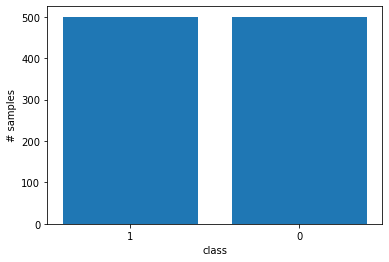

In [7]:
counts = df['label'].value_counts()
plt.bar(['1','0'], counts)
plt.xlabel('class')
plt.ylabel('# samples')
plt.show()

### Visualize the data

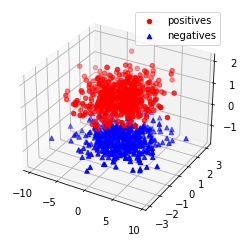

In [8]:
positives = df[df["label"] == 1].values
negatives = df[df["label"] == 0].values

ax = plt.axes(projection='3d')
ax.scatter3D(positives[:,0], positives[:,1], positives[:,2], c='r',marker='o')
ax.scatter3D(negatives[:,0], negatives[:,1], negatives[:,2], c='b',marker='^')
plt.legend(['positives','negatives'])
plt.show()

In [9]:
data = df.values

We will now split the data into a 70%-30% split fot training and testing respectively

In [10]:
train_X,train_y,test_X,test_y = train_test_split(data,0.7)
perceptron.fit(train_X,train_y)

100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 80.86it/s]

0.0
[ 0.00122276 -0.00302838  0.00063562  0.10711663]


In [11]:
train_predictions = perceptron.predict(train_X)
test_predictions = perceptron.predict(test_X)

testing_accuracy = 100*np.sum((test_predictions == test_y))/len(test_y)
training_accuracy = 100*np.sum((train_predictions == train_y))/len(train_y)

print("Training accuracy {}".format(training_accuracy))
print("Testing accuracy {}".format(testing_accuracy))

Training accuracy 100.0
Testing accuracy 99.33333333333333


## Dataset - 2

In [12]:
df = pd.read_csv('dataset_LP_1.txt',header = None)
df.columns = ["feature 1","feature 2", "feature 3","feature 4","label"]

In [13]:
df

,feature 1,feature 2,feature 3,feature 4,label
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


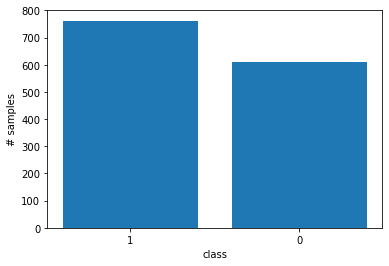

In [14]:
counts = df['label'].value_counts()
plt.bar(['1','0'], counts)
plt.xlabel('class')
plt.ylabel('# samples')
plt.show()

In [24]:
data = df.values

In [25]:
train_X,train_y,test_X,test_y = train_test_split(data,0.7)
perceptron.fit(train_X,train_y)

100%|█████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 56.99it/s]

0.35202427102628264
[ 0.10595762 -0.12948173 -0.07746804 -0.08009498 -0.02034381]


In [26]:
train_predictions = perceptron.predict(train_X)
test_predictions = perceptron.predict(test_X)

testing_accuracy = 100*np.sum((test_predictions == test_y))/len(test_y)
training_accuracy = 100*np.sum((train_predictions == train_y))/len(train_y)

print("Training accuracy {}".format(training_accuracy))
print("Testing accuracy {}".format(testing_accuracy))

Training accuracy 98.02083333333333
Testing accuracy 99.27184466019418
